<a href="https://colab.research.google.com/github/Begge10850/machine_learning/blob/main/notebooks/machine-learning/supervised-learning/model_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Assessment
You should build a machine learning pipeline with a complete model assessment step. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Choose a few machine learning algorithms, such as [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), and [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Define a grid of hyperparameters for every selected model.
- Conduct [grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) using k-fold cross-validation on the training set to find out the best model (i.e., the best algorithm and its hyperparameters).
- Train the best model on the whole training set.
- Test the trained model on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('mnist.csv')

In [10]:
df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = df.drop(columns=['id', 'class'])  # Features (exclude 'id' and 'class')
y = df['class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3200, 784)
X_test shape: (800, 784)
y_train shape: (3200,)
y_test shape: (800,)


In [12]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

param_grid_tree = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

In [15]:
# Initializing the models
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)

# Performing the Grid Search with 5-fold cross-validation for each model
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [16]:
# Get the best model based on cross-validation results
best_model = max([grid_search_knn, grid_search_tree, grid_search_svm], key=lambda x: x.best_score_)

# Print the best parameters for each model
print("Best KNN parameters: ", grid_search_knn.best_params_)
print("Best Decision Tree parameters: ", grid_search_tree.best_params_)
print("Best SVM parameters: ", grid_search_svm.best_params_)

Best KNN parameters:  {'n_neighbors': 3, 'weights': 'distance'}
Best Decision Tree parameters:  {'max_depth': 20, 'min_samples_split': 2}
Best SVM parameters:  {'C': 10, 'kernel': 'rbf'}


In [17]:
# Train the best model on the entire training set
best_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

Test Accuracy: 0.9475
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       0.96      0.97      0.97       100
           2       0.93      0.90      0.92        73
           3       0.94      0.93      0.94        86
           4       0.93      0.97      0.95        80
           5       0.87      0.97      0.92        64
           6       0.98      0.96      0.97        90
           7       0.98      0.96      0.97        67
           8       0.94      0.89      0.92        94
           9       0.96      0.93      0.95        76

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



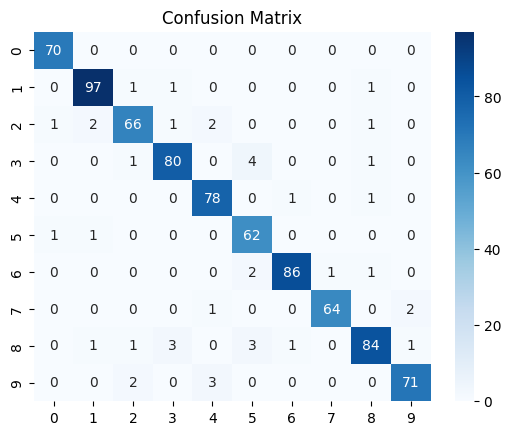

In [19]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()